# Stock Market Prediction and Forecasting using Stacked LSTM

### Using Keras API and Tensorflow2.0

## Steps- 
 - Collect Data - 2015 till today
 - Preprocessing of data
 - Create a stack LSTM Model
 - Predict the test data and plot 
 - Predict future

In [3]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/7d/76/31fb9c58398f4cbdde4a0831d0407a1ca987fe828c7da9ce80969014a5a1/yfinance-0.2.40-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     -- ------------------------------------- 0.2/3.0 MB 6.1 MB/s eta 0:00:01
     ---------- ----------------------------- 0.7/3.0 MB 9.5 MB/s eta 0:00:01
     -------------------------- ------------- 2.0/3.0 MB 17.7 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 

In [13]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df=yf.download("AAPL",period="5y")

[*********************100%%**********************]  1 of 1 completed


In [10]:
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-30,44.487499,44.807499,44.167500,44.575001,43.019207,84873600
2019-05-31,44.057499,44.497501,43.747501,43.767502,42.239895,108174400
2019-06-03,43.900002,44.480000,42.567501,43.325001,41.812836,161584400
2019-06-04,43.860001,44.957500,43.630001,44.910000,43.342514,123872000
2019-06-05,46.070000,46.247501,45.285000,45.634998,44.042210,119093600
...,...,...,...,...,...,...
2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500
2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900
2024-05-24,188.820007,190.580002,188.039993,189.979996,189.979996,36294600


<Axes: xlabel='Date', ylabel='Close'>

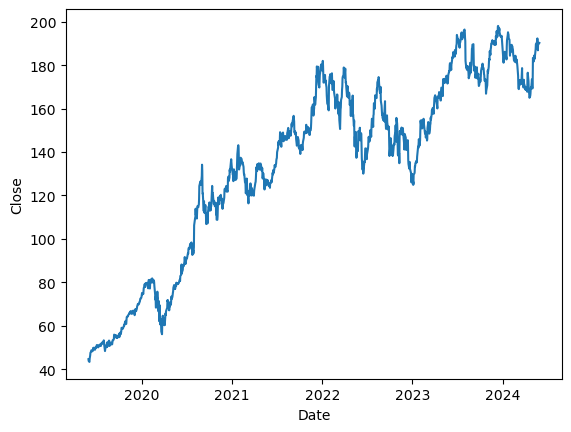

In [12]:
import seaborn as sns
sns.lineplot(df['Close'])

### LSTM is sensitive to scale of the data, so we'll apply MinMax Scaler

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler=MinMaxScaler()
data=df['Close']
scaled_data=scaler.fit_transform(data.values.reshape(-1,1))

In [21]:
scaled_data.shape

(1259, 1)

### Train Test split for time series data should not be done randomly or using Cross Val, because data will be dependant on previous day's data, so we should do it manually 

In [40]:
# 70 - 30 split
train_size=int(len(scaled_data)*0.70)
test_size=len(scaled_data)-train_size
train_data,test_data=scaled_data[0:train_size],scaled_data[train_size:len(scaled_data),:1]

In [41]:
train_data.shape

(881, 1)

In [42]:
test_data.shape

(378, 1)

## Converting the data into a dataframe , that has timestep dependency


### Timesteps means , how many days in past , does the current day price depend upon?




In [48]:
def create_dataset(dataset,time_step):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [49]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [50]:
X_train.shape

(780, 100)

In [51]:
X_test.shape

(277, 100)

In [53]:
y_train.shape

(780,)

In [55]:
y_test.shape

(277,)

## Before applying stacked LSTM


### Reshape X data into 3D array , by adding 1 

In [57]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [58]:
# Creating the Model 
from tensorflow.keras.models import Sequentialquential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [61]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [63]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 241ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 230ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 256ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - loss: 0.0011 - val_loss: 9.0472e-04
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - loss: 0.0011 - val_loss: 8.6519e-04
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step - loss: 0.0011 - val_loss: 8.3394e-04
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 263ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 254ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 12/100
13/13 ━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - loss: 5.4521e-04 - val_loss: 5.2241e-04
Epoch 66/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - loss: 7.9441e-04 - val_loss: 0.0014
Epoch 67/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - loss: 6.4729e-04 - val_loss: 4.6140e-04
Epoch 68/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/step - loss: 6.2909e-04 - val_loss: 6.6906e-04
Epoch 69/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step - loss: 5.7057e-04 - val_loss: 4.5697e-04
Epoch 70/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step - loss: 6.1658e-04 - val_loss: 4.1603e-04
Epoch 71/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - loss: 5.8900e-04 - val_loss: 5.5198e-04
Epoch 72/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 255ms/step - loss: 6.9993e-04 - val_loss: 6.1853e-04
Epoch 73/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 255ms/step - loss: 4.9414e-04 - val_loss: 3.9967e-04
Epoch 74/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - loss: 5.3209e-04 - val_loss: 5.1385e-04
Epoch 75/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 241ms/step - l

## Predictions

In [88]:
train_predict=model.predict(X_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


In [89]:
test_predict=model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


In [90]:
# Re-scaling it back to normal
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [91]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,train_predict)

16634.76132644539

In [92]:
#RMSE - 
print("RMSE For training data- ",np.sqrt(mean_squared_error(y_train,train_predict)))

RMSE For training data-  128.97581682798287


In [93]:
print("RMSE For testing data- ",np.sqrt(mean_squared_error(y_test,test_predict)))

RMSE For testing data-  177.7050548640193


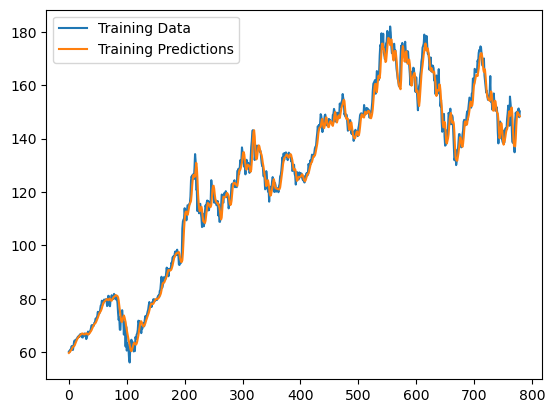

In [94]:
plt.plot(scaler.inverse_transform(y_train.reshape(-1,1)),label='Training Data')
plt.plot(train_predict,label='Training Predictions')
plt.legend()

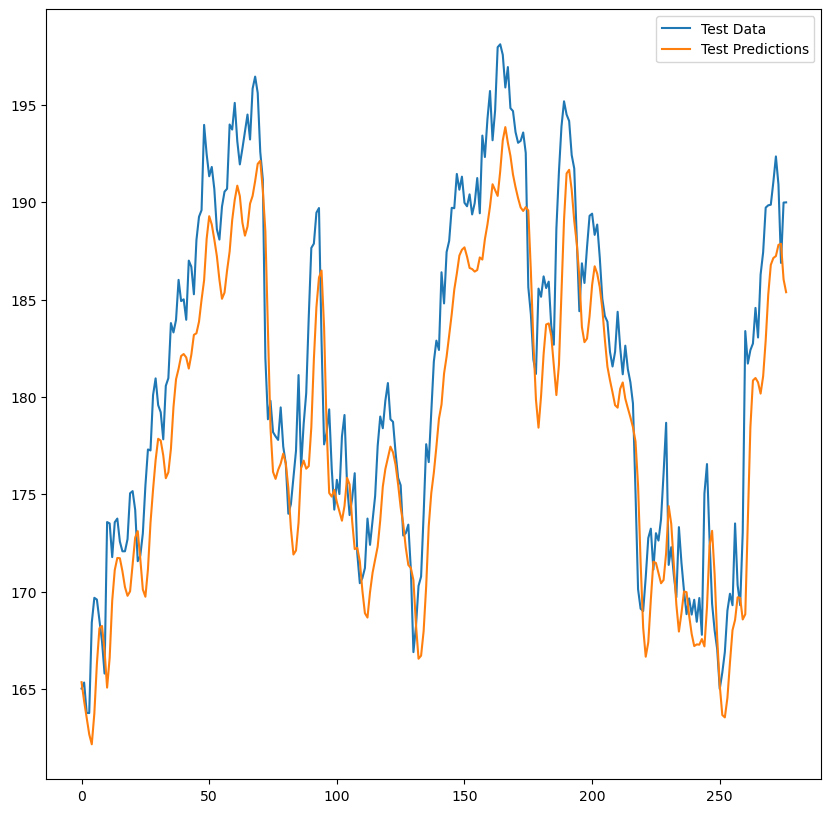

In [95]:
plt.figure(figsize=(10,10))
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)),label='Test Data')
plt.plot(test_predict,label='Test Predictions')
plt.legend()

## Predicting Next 30 days!

In [96]:
len(test_data)

378

In [97]:
# To calculate next day data, i'll need 100 (time_stap) prev days data
X_input=test_data[278:].reshape(1,-1)
X_input.shape

(1, 100)

In [100]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [101]:
temp_input

[0.89062242496844,
 0.9189197721734683,
 0.9162063427755336,
 0.9229899655606413,
 0.919113581517568,
 0.9212455828832042,
 0.9064509109938719,
 0.9003132864955821,
 0.9387537827510126,
 0.9576832182820372,
 0.9727363683505299,
 0.9810704658884339,
 0.9766773226481227,
 0.9745453212824864,
 0.963239316167487,
 0.958781504092115,
 0.9349419689624587,
 0.9114254822664818,
 0.9273185385464333,
 0.9207933939404858,
 0.9326161582527228,
 0.9430823557368044,
 0.9437930228586833,
 0.9367510204749565,
 0.9401751169947701,
 0.9291920617329092,
 0.9155602459081742,
 0.9098103386786247,
 0.9079368154921488,
 0.8979229055313269,
 0.8930774747677559,
 0.8979875743663877,
 0.9112316729223824,
 0.8992796695205649,
 0.8904932844594011,
 0.8999903366424438,
 0.8921729983017774,
 0.8878444253159856,
 0.8808024229322589,
 0.851342219662633,
 0.8191684884145312,
 0.812707914063103,
 0.811932676686705,
 0.8231094427121242,
 0.8361598305045606,
 0.8392608785906945,
 0.82569373160102,
 0.8377749740924174,
 0

In [141]:
import numpy as np

# Initialize the list to store output predictions
list_output = []

# Define the number of time steps for the input
n_steps = 100

# Start with the initial input list (temp_input) which should be of length 100
# temp_input needs to be defined before this loop starts

i = 0
while i < 30:
    if len(temp_input) > 100:
        # Shift the input window one position to the right (excluding the oldest value)
        X_input = np.array(temp_input[1:])
        
        # Reshape the input to the required dimensions for the model
        X_input = X_input.reshape((1, n_steps, 1))
        
        # Predict the next day's price
        yhat = model.predict(X_input, verbose=0)
        
        # Add the prediction to the input list and remove the oldest value
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        
        # Store the prediction in the output list
        list_output.extend(yhat.tolist())
        
    else:
        
        # Reshape the input to the required dimensions for the model
        X_input = temp_input.reshape((1, n_steps, 1))
        
        # Predict the next day's price
        yhat = model.predict(X_input, verbose=0)
        
        # Add the prediction to the input list
        temp_input.extend(yhat[0].tolist())
        
        # Store the prediction in the output list
        list_output.extend(yhat.tolist())
    
    i += 1

print(list_output)


[[0.5242748260498047], [0.5238404273986816], [0.523409903049469], [0.5229827761650085], [0.5225592851638794], [0.522139310836792], [0.5217229723930359], [0.5213097929954529], [0.520900309085846], [0.5204942226409912], [0.52009117603302], [0.5196917653083801], [0.5192954540252686], [0.5189023613929749], [0.518512487411499], [0.5181258916854858], [0.517742395401001], [0.5173618197441101], [0.5169844627380371], [0.5166101455688477], [0.516238808631897], [0.5158703923225403], [0.5155049562454224], [0.5151425004005432], [0.5147827863693237], [0.5144258141517639], [0.5140719413757324], [0.5137207508087158], [0.5133723020553589], [0.5130265355110168]]


In [143]:
len(list_output)

30

In [144]:

# Making time indexes to plot the data
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [145]:
len(scaled_data)

1259

In [146]:
final_data=scaled_data.tolist()
final_data.extend(list_output)
final_data

[[0.008075717939285132],
 [0.0028588110511448273],
 [0.0],
 [0.010240004432181093],
 [0.01492391097891238],
 [0.019252508609839625],
 [0.02721515466830987],
 [0.03113996640227279],
 [0.03474172970255612],
 [0.033740348564528067],
 [0.03367572901973798],
 [0.031398395291162395],
 [0.0332558005591439],
 [0.040620851376550304],
 [0.039684065138177016],
 [0.042252162173172514],
 [0.04115385171795938],
 [0.040830827929415],
 [0.03596925460221406],
 [0.04280130507821145],
 [0.042704400406161636],
 [0.03976482724659691],
 [0.04562780635696123],
 [0.04753366396096759],
 [0.050247118004037805],
 [0.049956379342753154],
 [0.04315663863915081],
 [0.0451271157879472],
 [0.04834123575489613],
 [0.045950830145505606],
 [0.04845430763571107],
 [0.05153923780335046],
 [0.050392475012112414],
 [0.048535069744130965],
 [0.0522660474888591],
 [0.047307544844473026],
 [0.05478566754269443],
 [0.05740219226857951],
 [0.05712762081606004],
 [0.05446264375415005],
 [0.05562554910901796],
 [0.0587589069675469

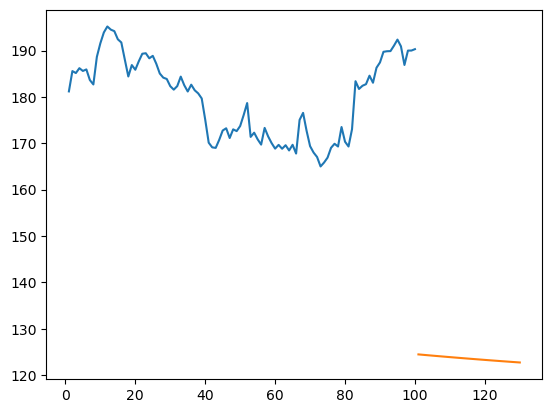

In [147]:
plt.plot(day_new,scaler.inverse_transform(scaled_data[1159:])) #1259-100 days
plt.plot(day_pred,scaler.inverse_transform(list_output))

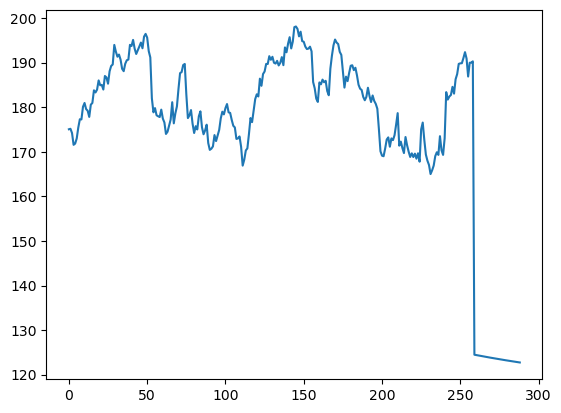

In [148]:
plt.plot(scaler.inverse_transform(np.array(final_data[1000:])))